In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
%matplotlib inline
from sklearn.model_selection import train_test_split


In [134]:
data = pd.read_csv('/content/mushrooms.csv')

In [135]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [136]:
X= data.drop(['class'], axis=1)

In [137]:
y= data['class']

In [138]:
X= pd.get_dummies(X, drop_first = True)

In [139]:
y.value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [140]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [141]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [142]:
var_thres.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

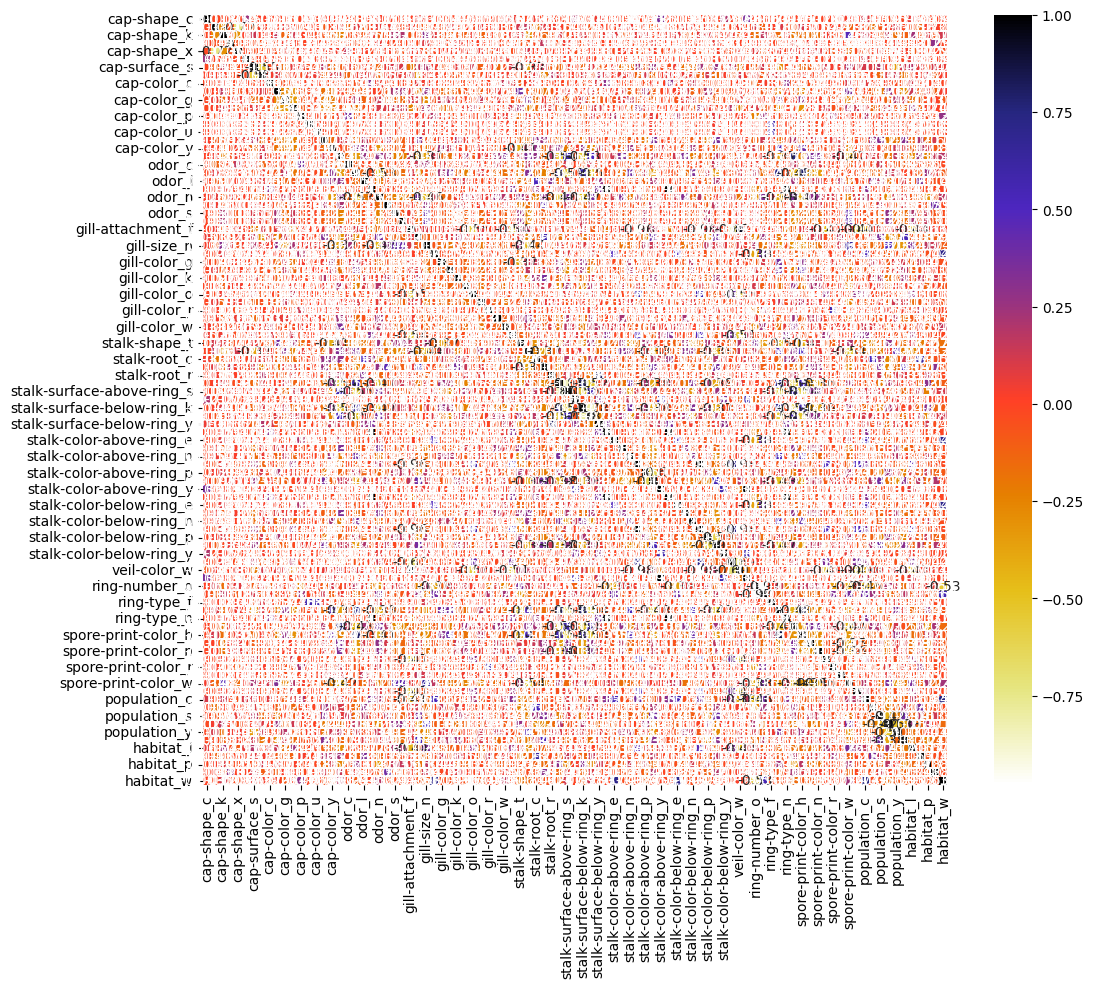

In [143]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [144]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [145]:
corr_features = correlation(X, 0.8)
len(set(corr_features))

11

In [146]:
X.drop(corr_features,axis=1)


,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [147]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)


In [148]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([0.00000000e+00, 0.00000000e+00, 5.93428571e-03, 0.00000000e+00,
       2.33091429e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.20670227e-03, 6.86079728e-03, 8.99176940e-04, 2.09552646e-03,
       2.53809854e-03, 0.00000000e+00, 0.00000000e+00, 1.64805463e-02,
       1.49718117e-02, 1.33556640e-01, 1.69132608e-02, 2.48059963e-01,
       3.96662694e-02, 1.09882449e-02, 3.75154461e-01, 2.14902303e-02,
       5.29217576e-02, 5.68345868e-02, 8.66241801e-03, 6.24881515e-02,
       1.63919191e-01, 4.05280164e-03, 6.12898600e-03, 2.64199993e-03,
       8.00161522e-03, 5.66916108e-02, 6.69162503e-03, 0.00000000e+00,
       8.32180718e-03, 2.28155268e-02, 2.59006824e-02, 0.00000000e+00,
       6.75280895e-05, 5.45192905e-03, 1.83378293e-02, 2.67406402e-02,
       2.27653681e-02, 1.97314601e-01, 1.25300993e-01, 1.00248977e-04,
       1.92508095e-01, 9.93771807e-02, 3.90055519e-03, 0.00000000e+00,
       3.26155791e-03, 5.03303575e-02, 2.26779327e-02, 1.10197266e-02,
      

In [149]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

odor_n                        0.375154
odor_f                        0.248060
stalk-surface-above-ring_k    0.197315
stalk-surface-below-ring_k    0.192508
gill-size_n                   0.163919
                                ...   
cap-surface_y                 0.000000
cap-surface_s                 0.000000
cap-surface_g                 0.000000
cap-shape_s                   0.000000
cap-shape_c                   0.000000
Length: 95, dtype: float64

<Axes: >

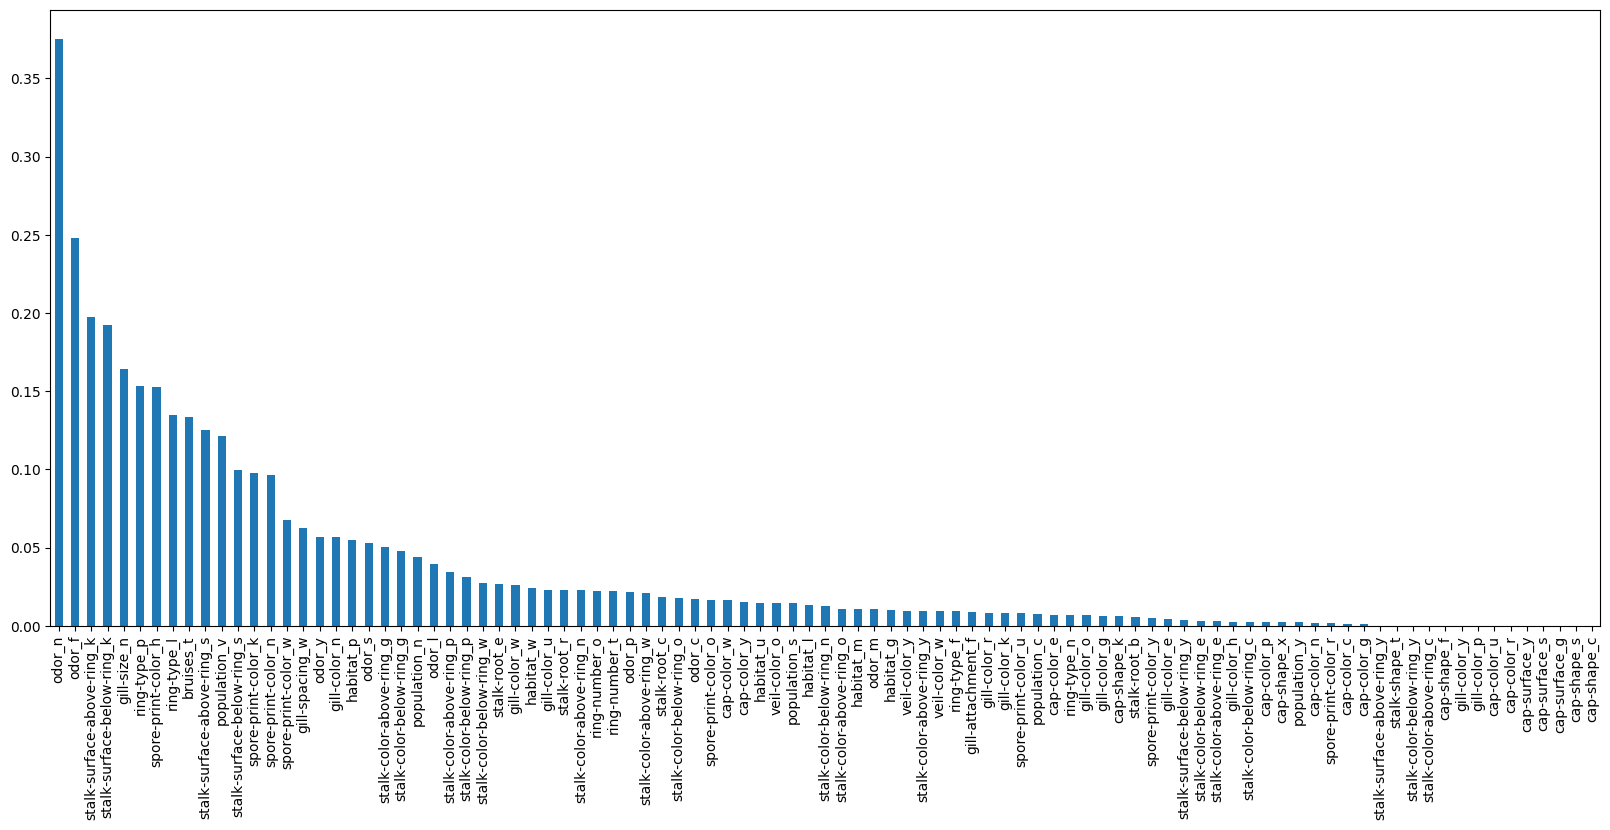

In [150]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))


In [151]:
from sklearn.feature_selection import SelectKBest


In [152]:
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(x_train, y_train)
x_train.columns[sel_five_cols.get_support()]

Index(['bruises_t', 'odor_f', 'odor_n', 'gill-size_n',
       'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s',
       'stalk-surface-below-ring_k', 'ring-type_l', 'ring-type_p',
       'spore-print-color_h'],
      dtype='object')

In [154]:
x_train = x_train[['bruises_t', 'odor_f', 'odor_n', 'gill-size_n',
       'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s',
       'stalk-surface-below-ring_k', 'ring-type_l', 'ring-type_p',
       'spore-print-color_h']]

In [155]:
num_features = x_train.select_dtypes(exclude ="object")
cat_features = x_train.select_dtypes(include ="object")

In [156]:
num_features

,bruises_t,odor_f,odor_n,gill-size_n,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-below-ring_k,ring-type_l,ring-type_p,spore-print-color_h
7873,0,0,0,1,0,1,1,0,0,0
6515,0,1,0,1,1,0,0,0,0,0
6141,0,0,0,1,0,1,0,0,0,0
2764,1,0,1,0,0,1,0,0,1,0
438,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
5226,0,1,0,1,1,0,0,0,0,0
5390,1,0,1,0,0,1,0,0,0,0
860,1,0,0,0,0,1,0,0,1,0
7603,0,1,0,1,0,1,0,0,0,0


In [190]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLarsCV, RANSACRegressor, ElasticNet, Lasso, SGDClassifier,ARDRegression, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import HistGradientBoostingRegressor,BaggingRegressor, GradientBoostingRegressor

from sklearn.metrics import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    BaggingClassifier, ExtraTreesClassifier
)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from tabulate import tabulate  # Import the tabulate library

from tabulate import tabulate
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import LSTM, Dense, SimpleRNN
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder( sparse = False,drop='first', handle_unknown='ignore'),cat_features.columns),
        ('num_tnf', StandardScaler(), num_features.columns)
    ],
    remainder='passthrough'
)

In [194]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier
from tqdm import tqdm
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LSTM, GRU, Embedding, SimpleRNN, Dropout


# Ignore all warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import *

def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Preprocess 'previous_year_rating' column


    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    # Use appropriate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred,  average="macro")
    f1 = f1_score(y_test, y_pred,  average="macro")

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, cm


# Initialize different classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'HistGradientBoosting Classifier': HistGradientBoostingClassifier(),
    'SGD Classifier': SGDClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
    'Ridge Classifier': RidgeClassifier(),
    'MLP Neural Network': MLPClassifier(hidden_layer_sizes=(10,), max_iter=100),


}
# Create a list to store the results
results = []

# Evaluate and print classification metrics for different models
for model_name, model in tqdm(models.items()):
    accuracy, precision, recall, f1, cm = evaluate_model(model, x_train, y_train, x_test, y_test)
    results.append([model_name, accuracy, precision, recall, f1, cm])

# Print the results in a tabular form
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Confusion Matrix"]
print(tabulate(results, headers, tablefmt="grid"))

max_accuracy_index = np.argmax([result[1] for result in results])
best_model_name = results[max_accuracy_index][0]
print(f"\nThe model with the highest accuracy is: {best_model_name} (Accuracy: {results[max_accuracy_index][1]:.4f})")

100%|██████████| 15/15 [00:04<00:00,  3.02it/s]

+---------------------------------+------------+-------------+----------+------------+--------------------+
| Model                           |   Accuracy |   Precision |   Recall |   F1 Score | Confusion Matrix   |
+=================================+============+=============+==========+============+====================+
| Logistic Regression             |   0.969846 |    0.969664 | 0.970197 |   0.969824 | [[810  33]         |
|                                 |            |             |          |            |  [ 16 766]]        |
+---------------------------------+------------+-------------+----------+------------+--------------------+
| Random Forest Classifier        |   0.974154 |    0.973972 | 0.974395 |   0.97413  | [[816  27]         |
|                                 |            |             |          |            |  [ 15 767]]        |
+---------------------------------+------------+-------------+----------+------------+--------------------+
| Gradient Boosting Classifi


The model with the highest accuracy is: Random Forest Classifier (Accuracy: 0.974)


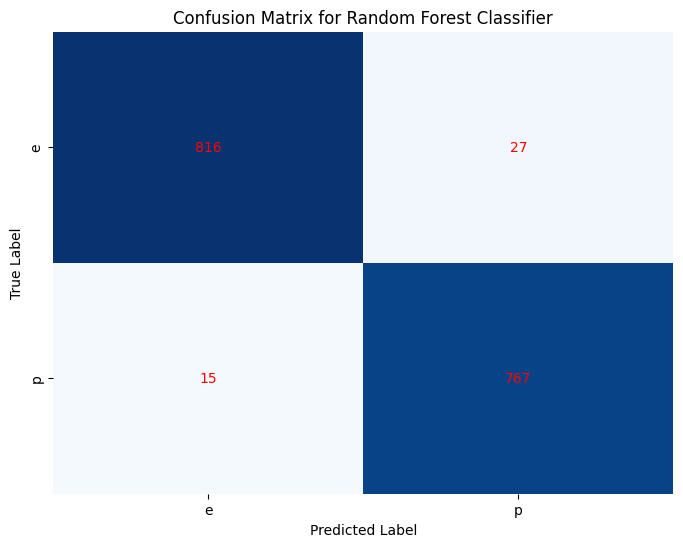

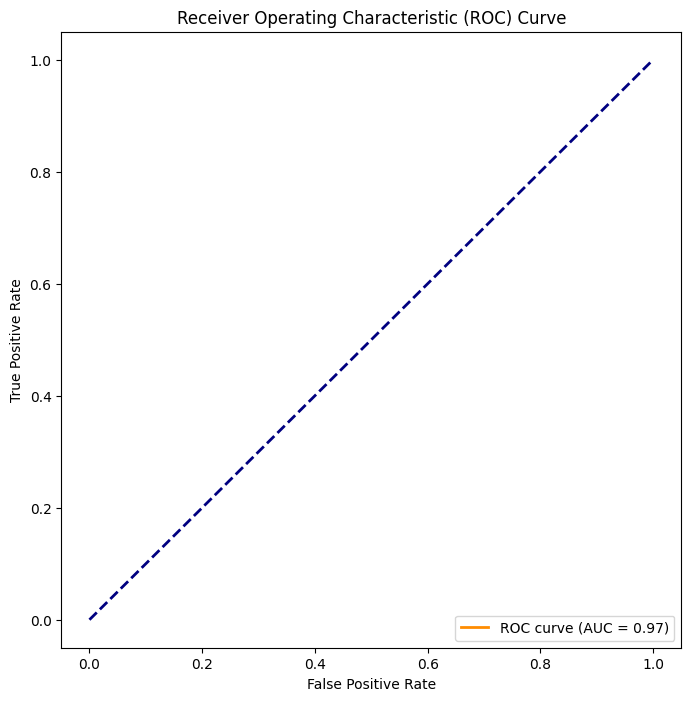

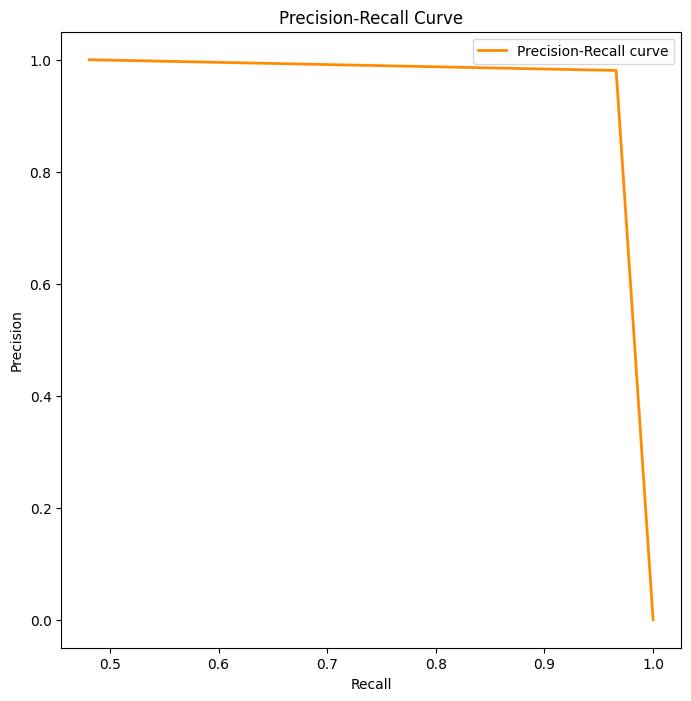

In [199]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define your class labels (replace with your actual class labels)
class_labels = ['e', 'p']


# Define your step1 transformer (replace with your actual transformer)

def evaluate_model(model, x_train, y_train, x_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    # Convert string labels to binary labels
    label_mapping = {label: idx for idx, label in enumerate(class_labels)}
    y_test_binary = np.array([label_mapping[label] for label in y_test])
    y_pred_binary = np.array([label_mapping[label] for label in y_pred])

    # Use appropriate classification metrics
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    precision = precision_score(y_test_binary, y_pred_binary, average="macro")
    recall = recall_score(y_test_binary, y_pred_binary, average="macro")
    f1 = f1_score(y_test_binary, y_pred_binary, average="macro")

    # Calculate the confusion matrix with class labels
    cm = confusion_matrix(y_test_binary, y_pred_binary)

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
    roc_auc = auc(fpr, tpr)

    # Calculate Precision-Recall curve
    precision_curve, recall_curve, _ = precision_recall_curve(y_test_binary, y_pred_binary)

    return accuracy, precision, recall, f1, cm, fpr, tpr, roc_auc, precision_curve, recall_curve

# Initialize different classification models
models = {
    'Random Forest Classifier': RandomForestClassifier(**Hyperparameters)
}

# Create a list to store the results
results = []

# Evaluate and print classification metrics for different models
for model_name, model in models.items():
    accuracy, precision, recall, f1, cm, fpr, tpr, roc_auc, precision_curve, recall_curve = evaluate_model(model, x_train, y_train, x_test, y_test)
    results.append([model_name, accuracy, precision, recall, f1, cm, roc_auc, precision_curve, recall_curve])




max_accuracy_index = np.argmax([result[1] for result in results])
best_model_name = results[max_accuracy_index][0]
print(f"\nThe model with the highest accuracy is: {best_model_name} (Accuracy: {results[max_accuracy_index][1]:.3f})")

# Plot confusion matrix with class labels and show labels
plt.figure(figsize=(8, 6))

# Show diagonal elements in red color
sns.heatmap(results[max_accuracy_index][5], annot=True, fmt="d", cmap="Blues", cbar=False, vmin=0, vmax=results[max_accuracy_index][5].diagonal().max() + 12, annot_kws={"color": "red"})

plt.title(f"Confusion Matrix for {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(results[max_accuracy_index][4], results[max_accuracy_index][3], color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(results[max_accuracy_index][6]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(8, 8))
plt.plot(results[max_accuracy_index][7], results[max_accuracy_index][8], color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [128]:
y_train_encoded = y_train_encoded[:-1]
y_train_encoded.shape

(6499,)

In [181]:
model = RandomForestClassifier(**Hyperparameters)
model.fit(x_train, y_train)  # Training the model

# Calculate metrics on the training set
train_accuracy = accuracy_score(y_train, model.predict(x_train))
train_precision = precision_score(y_train, model.predict(x_train), average='macro')
train_recall = recall_score(y_train, model.predict(x_train), average='macro')
train_f1 = f1_score(y_train, model.predict(x_train), average='macro')

# Calculate metrics on the test set
test_accuracy = accuracy_score(y_test, model.predict(x_test))
test_precision = precision_score(y_test, model.predict(x_test), average='macro')
test_recall = recall_score(y_test, model.predict(x_test), average='macro')
test_f1 = f1_score(y_test, model.predict(x_test), average='macro')

# Create a DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train Set': [train_accuracy, train_precision, train_recall, train_f1],
    'Test Set': [test_accuracy, test_precision, test_recall, test_f1]
})


In [183]:
metrics_df

,Metric,Train Set,Test Set
0,Accuracy,0.979375,0.974154
1,Precision,0.979330,0.973972
2,Recall,0.979371,0.974395
3,F1 Score,0.979350,0.974130


In [178]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10,20,40],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [40,50,60],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a base model
base_model = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, verbose=2, n_jobs=-1)

# Fit the grid search model
grid_search.fit(x_train, y_train_encoded)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [179]:
 Hyperparameters= {'bootstrap': True, 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [180]:
Hyperparameters

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}